In [ ]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [24]:
import matplotlib.pyplot as plt
import librosa
import numpy as np

In [11]:
root = '/kaggle/input/audio-mnist/data/10'
files = []

for i in range (0, 10):
    file_path = root + '/' + str(i) + '_10_0.wav'
    file = librosa.load(file_path)[0]
    files.append(file)

In [12]:
len(files)

10

In [13]:
files

[array([ 0.00027429,  0.00045638,  0.00042689, ..., -0.00021109,
        -0.00024099, -0.00028235], dtype=float32),
 array([-2.8014627e-05, -4.2212823e-06, -4.8440474e-05, ...,
        -6.7110639e-04, -6.4671226e-04, -5.5642123e-04], dtype=float32),
 array([ 1.08870314e-04,  9.24428023e-05,  1.00245496e-04, ...,
        -1.47007086e-04, -2.06704222e-04,  0.00000000e+00], dtype=float32),
 array([-3.2900462e-05, -8.5524043e-05, -1.2998484e-04, ...,
         3.6301094e-04,  3.9724653e-04,  3.8200503e-04], dtype=float32),
 array([-0.00013055, -0.00015115, -0.00026111, ..., -0.00111896,
        -0.00135999,  0.        ], dtype=float32),
 array([-7.814013e-05, -9.173674e-05, -7.679391e-05, ..., -6.283017e-04,
        -7.143076e-04, -4.949211e-04], dtype=float32),
 array([ 0.00013099,  0.00018971,  0.00018819, ..., -0.00079712,
        -0.00078884, -0.0008526 ], dtype=float32),
 array([ 9.1970265e-05,  1.4947880e-04,  1.1315821e-04, ...,
        -1.3351766e-04, -1.1019362e-04, -1.4310314e-04]

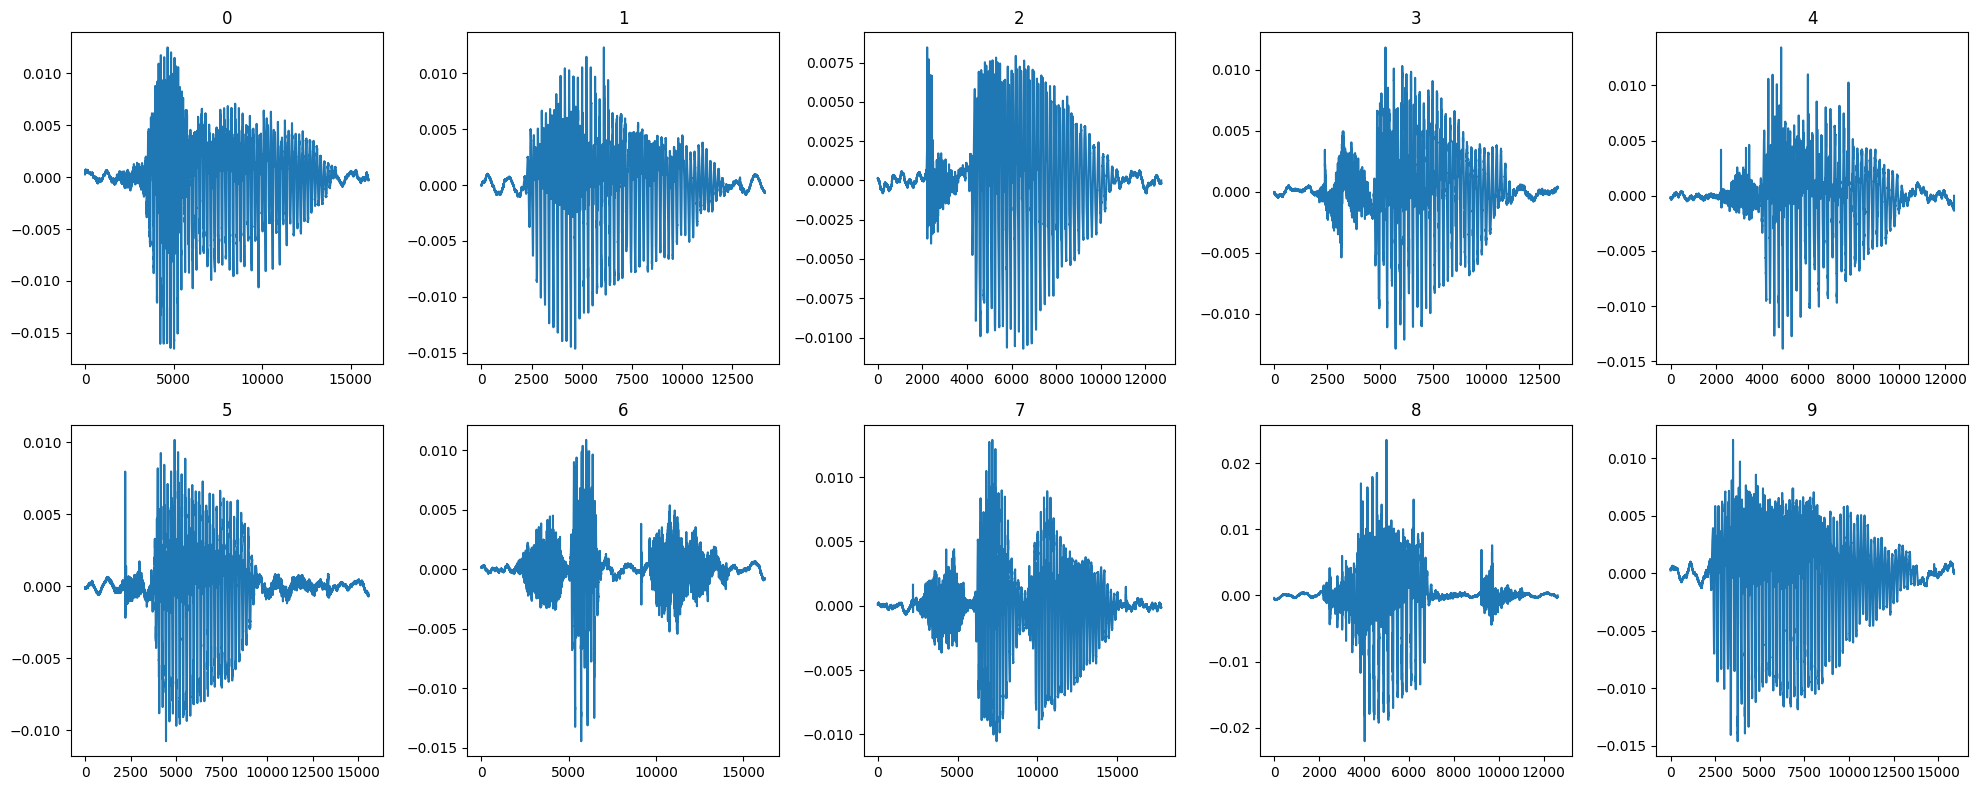

In [33]:
# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# Plot each array in a subplot
for i in range(10):
    axs[i // 5, i % 5].plot(files[i])
    axs[i // 5, i % 5].set_title(str(i))

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [34]:
def calc_fft(y, rate):
    n = len(y)
    freq = np.fft.rfftfreq(n, d=1/rate)
    Y = abs(np.fft.rfft(y)/n)
    return (Y, freq)

In [41]:
FFT = []

for item in files:
    temp = ()
    a, b = calc_fft(item, 22050)
    temp += (a,)
    temp += (b,)
    FFT.append(temp)

In [42]:
len(FFT)

10

In [43]:
FFT

[(array([5.15683808e-06, 1.04117463e-05, 8.74554774e-06, ...,
         2.94301201e-09, 2.94305162e-09, 2.94208958e-09]),
  array([0.00000000e+00, 1.37752233e+00, 2.75504467e+00, ...,
         1.10215562e+04, 1.10229337e+04, 1.10243112e+04])),
 (array([4.14661414e-06, 1.13988473e-05, 1.32311415e-05, ...,
         8.75521251e-09, 8.75497583e-09, 8.75232093e-09]),
  array([0.00000000e+00, 1.56139357e+00, 3.12278714e+00, ...,
         1.10218772e+04, 1.10234386e+04, 1.10250000e+04])),
 (array([2.92058902e-05, 9.66632605e-06, 2.05952491e-05, ...,
         1.48699367e-08, 1.48669505e-08, 1.48713912e-08]),
  array([0.00000000e+00, 1.73458150e+00, 3.46916300e+00, ...,
         1.10215308e+04, 1.10232654e+04, 1.10250000e+04])),
 (array([2.51433164e-05, 7.07139954e-06, 6.35797685e-06, ...,
         1.02469291e-08, 1.02429202e-08, 1.02479773e-08]),
  array([0.00000000e+00, 1.64933802e+00, 3.29867604e+00, ...,
         1.10208767e+04, 1.10225260e+04, 1.10241753e+04])),
 (array([2.86594462e-05, 1.0

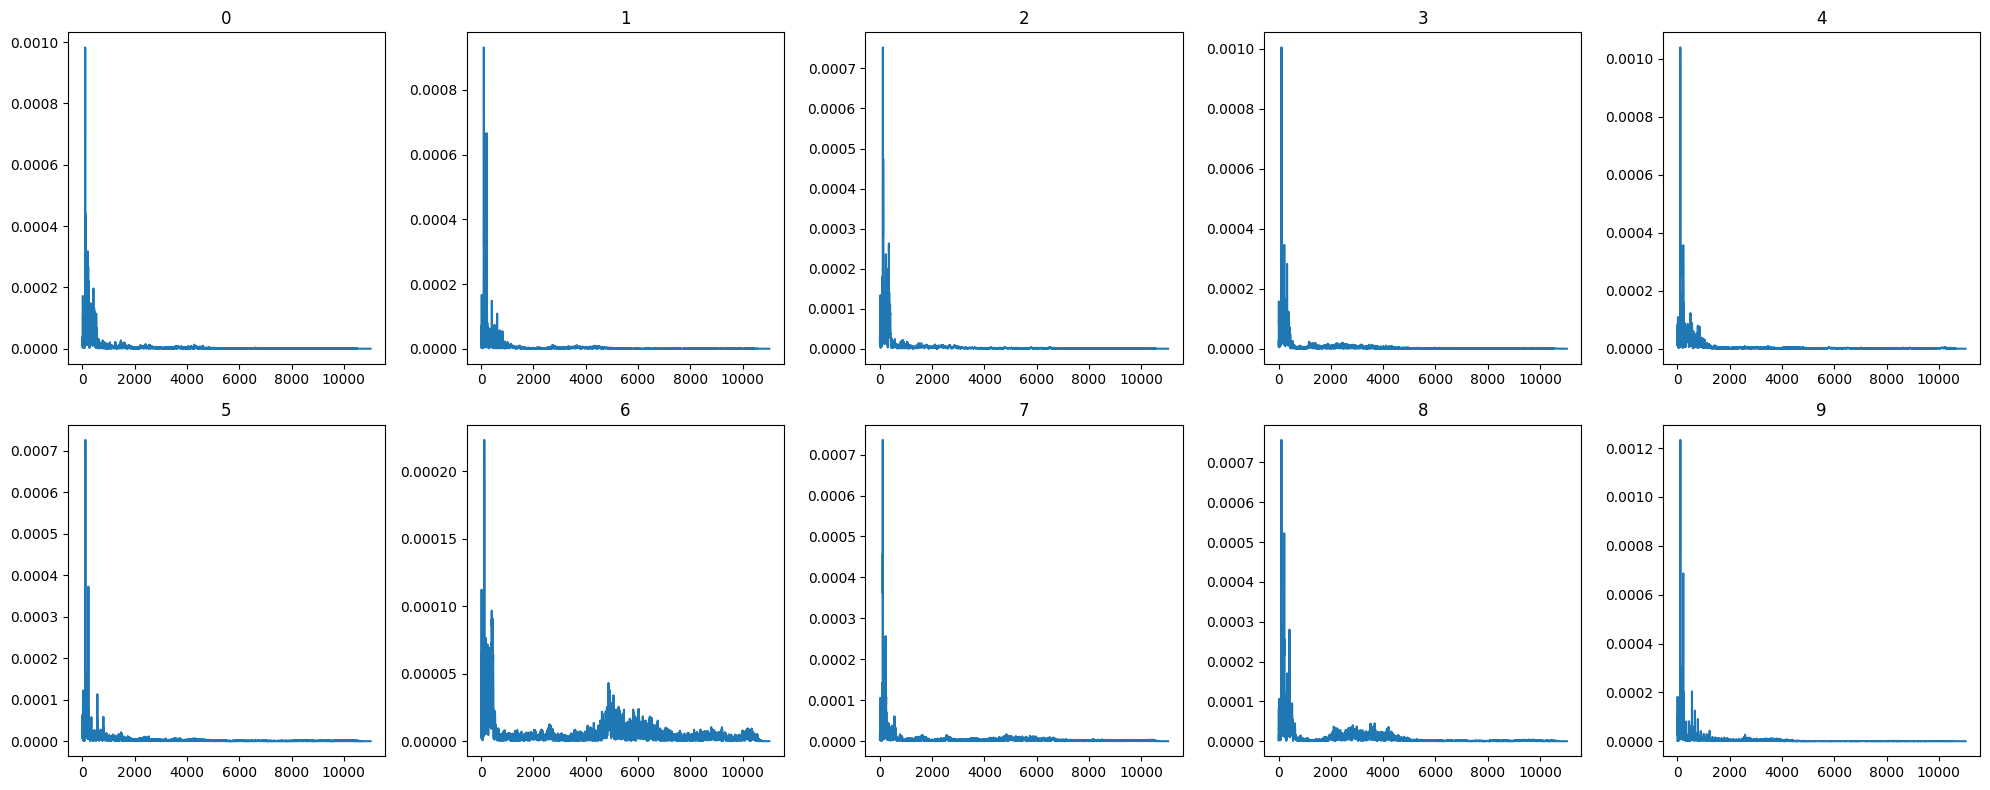

In [45]:
# Create subplots
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# Plot each array in a subplot
for i in range(10):
    axs[i // 5, i % 5].plot(FFT[i][1], FFT[i][0])
    axs[i // 5, i % 5].set_title(str(i))

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()

In [73]:
import torch
import torchaudio

spectrum = []
root = '/kaggle/input/audio-mnist/data/10'

for i in range(0, 10):
    file_path = root + '/' + str(i) + '_10_0.wav'
    ToSpectrogram = torchaudio.transforms.MelSpectrogram()
    ToDB = torchaudio.transforms.AmplitudeToDB()
    audio_padded = torch.zeros((1,48000))
    audio = torchaudio.load(file_path)
    audio_padded[0,:len(audio[0][0])] = audio[0][0]
    spectrogram = ToSpectrogram(audio_padded)
    spectrogram = ToDB(spectrogram)
    spectrum += spectrogram

In [74]:
len(spectrum)

10

In [75]:
spectrum

[tensor([[-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
          -100.0000],
         [ -33.4989,  -33.5335,  -33.4902,  ..., -100.0000, -100.0000,
          -100.0000],
         [ -26.1876,  -26.2223,  -26.1789,  ..., -100.0000, -100.0000,
          -100.0000],
         ...,
         [ -61.1096,  -65.9164,  -63.7570,  ..., -100.0000, -100.0000,
          -100.0000],
         [ -64.5754,  -69.1136,  -63.3778,  ..., -100.0000, -100.0000,
          -100.0000],
         [ -64.7398,  -63.0339,  -64.6373,  ..., -100.0000, -100.0000,
          -100.0000]]),
 tensor([[-100.0000, -100.0000, -100.0000,  ..., -100.0000, -100.0000,
          -100.0000],
         [ -61.3055,  -37.7284,  -35.6366,  ..., -100.0000, -100.0000,
          -100.0000],
         [ -53.9943,  -30.4172,  -28.3253,  ..., -100.0000, -100.0000,
          -100.0000],
         ...,
         [ -66.5076,  -61.0213,  -59.9401,  ..., -100.0000, -100.0000,
          -100.0000],
         [ -68.9175,  -61.3788,  -66.230

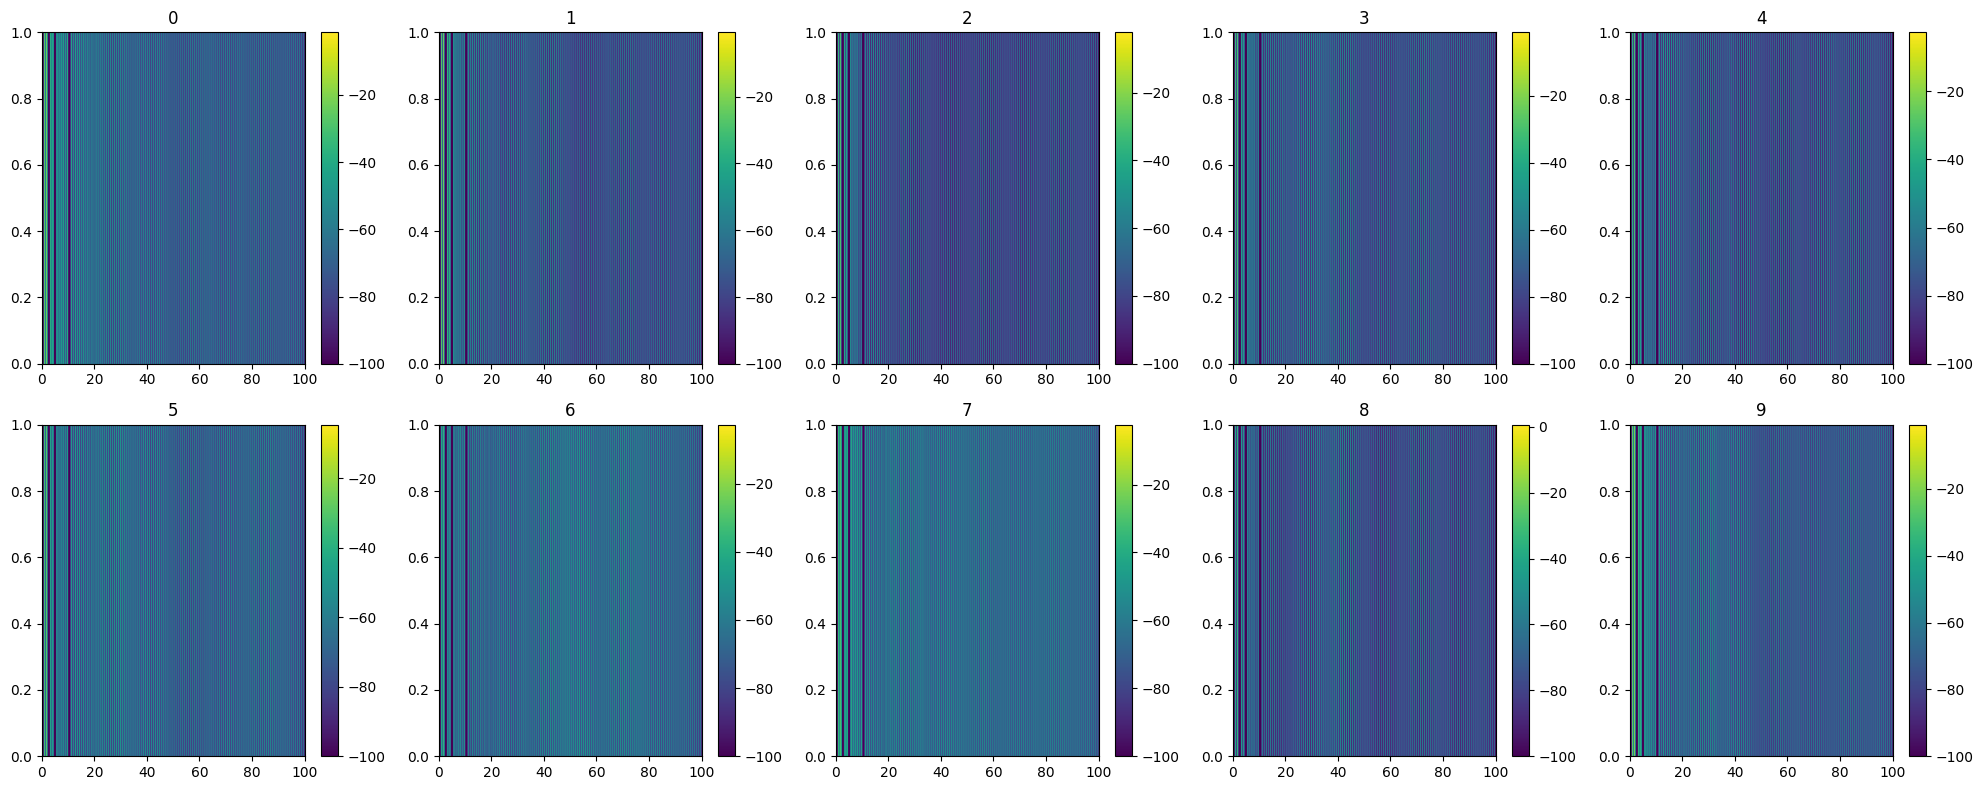

In [78]:
fig, axs = plt.subplots(2, 5, figsize=(20, 8))

# Flatten the axs array to simplify indexing
axs = axs.flatten()

# Plot heatmap for each array in a subplot
for i, ax in enumerate(axs):
    im = ax.imshow(spectrum[i].reshape(1, -1), cmap='viridis', aspect='auto', extent=[0, 100, 0, 1])
    ax.set_title(i)
    fig.colorbar(im, ax=ax)

# Adjust layout to prevent overlapping
plt.tight_layout()

# Show the plot
plt.show()